# Regressão Logística usando Softmax NMIST no Keras

Este notebook procura reproduzir o exemplo de Regressão Logística usando Softmax,
já feito utilizando programação matricial. 
Neste notebook utiliza-se o Keras, utilizando o mesmo modelo e mesmos parâmetros

## Import the libraries

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Getting the data
Keras also offers a collection of datasets that can be used to train and test the model. The MNIST set is a part of the available datasets and can be loaded as shown below.

In [10]:
from keras.datasets import mnist 
# the data, shuffled and split between train and test sets 
(X_train_orig, y_train), (X_test_orig, y_test) = mnist.load_data()

# Reshaping and normalizing the inputs

In [2]:
k = nb_classes = 10
(n,height,width) = X_train_orig.shape  # deve ser 60000 amostras de 28 x 28 pixels
m = input_dim = height * width
print 'n. amostras treinamento:',n,'n. classes:',k,'n. de atributos:',m
print 'X_train_orig shape original:', X_train_orig.shape
X_train = X_train_orig.reshape(n, input_dim)/255. 
print 'X_train novo shape:', X_train.shape
X_test = X_test_orig.reshape(10000, input_dim)/255.


n. amostras treinamento: 60000 n. classes: 10 n. de atributos: 784
X_train_orig shape original: (60000, 28, 28)
X_train novo shape: (60000, 784)


### Usando apenas 500 para treinamento e 100 para teste

Para ficar igual ao exemplo usando programação matricial

In [18]:
X_train = X_train[:500]
y_train = y_train[:500]
X_test  = X_test[:100]
y_test  = y_test[:100]

# Convert class vectors to binary class matrices

In [19]:
from keras.utils import np_utils 
Y_train = np_utils.to_categorical(y_train, nb_classes) 
Y_test = np_utils.to_categorical(y_test, nb_classes)
print y_train[0:5]
print Y_train[0:5]

[5 0 4 1 9]
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


# Build the model

In [20]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.optimizers import SGD
output_dim = nb_classes = 10 
model = Sequential() 
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax')) 
batch_size = 500
nb_epoch = 1000

# Compile the model

Excelente blog sobre otimização:

http://sebastianruder.com/optimizing-gradient-descent/


In [21]:
sgd = SGD(lr= 0.5, decay=0e-6, momentum=0., nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy') 
#model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,verbose=0, validation_data=(X_test, Y_test)) 
loss = model.evaluate(X_test, Y_test, verbose=0)
print 'loss:',loss


loss: 0.380618659258


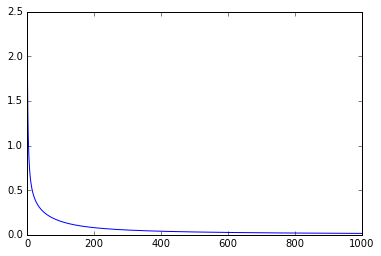

In [22]:
plt.plot(history.history['loss'])

In [23]:
def getAccuracy(X,Y):
    Y_hat = model.predict_classes(X)
    accuracy = sum(Y_hat == Y)/(float(len(Y)))
    return accuracy

train_ac = getAccuracy(X_train,y_train)
test_ac  = getAccuracy(X_test,y_test)
print 
print 'Training Accuracy: ', train_ac
print 'Test Accuracy: ', test_ac
# usual 0.868 e 0.77

100/100 [==============================] - 0s     

Training Accuracy:  1.0
Test Accuracy:  0.85


In [24]:
y_hat = model.predict_classes(X_test)
print y_hat.shape
print 'y_hat: ',y_hat[:20]
print 'y_test:',y_test[:20]
print y_test.shape
pd.crosstab(y_hat, y_test)

 32/100 [========>.....................] - ETA: 0s(100,)
y_hat:  [7 2 1 0 4 1 9 9 2 9 0 6 9 0 1 3 7 7 3 4]
y_test: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
(100,)


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,8,0,0,0,0,0,0,0,0,0
1,0,14,0,0,0,0,0,0,0,0
2,0,0,7,0,0,1,1,1,0,0
3,0,0,1,10,0,1,0,0,0,0
4,0,0,0,0,12,1,0,0,0,0
5,0,0,0,1,0,3,0,0,1,0
6,0,0,0,0,0,0,9,0,0,0
7,0,0,0,0,0,1,0,12,0,2
8,0,0,0,0,0,0,0,0,1,0
